### Problem - Indentify position of shelfs and divide the image based on blocks

# Imports

In [81]:
import cv2
import numpy as np
import pandas as pd

from skimage import io

from time import strftime

from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [1]:
shelf_image="https://5.imimg.com/data5/SV/FD/MY-30413995/product-display-rack-500x500.jpg"

### 1 - Divide image by columns

### Read image and set color to cv2's BRG color

In [6]:
img = cv2.cvtColor(io.imread(shelf_image), cv2.COLOR_RGB2BGR)
img.shape

(500, 500, 3)

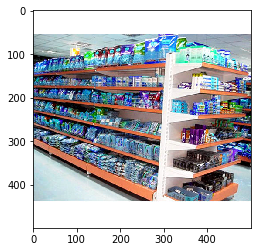

In [12]:
plt.imshow(img, interpolation='nearest')
plt.show()

#### Convert image to grey scale

In [26]:
img_thr_inv = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 128, 255, cv2.THRESH_BINARY_INV)[1]
img_thr_inv.shape

(500, 500)

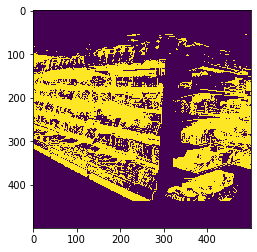

In [27]:
plt.imshow(img_thr_inv, interpolation='nearest')
plt.show()

In [30]:
img_thr = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 128, 255,cv2.THRESH_BINARY)[1]
img_thr.shape

(500, 500)

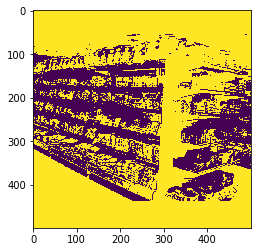

In [31]:
plt.imshow(img_thr, interpolation='nearest')
plt.show()

#### Find peaks by counting the pixels on x and y axis

In [32]:
y_sum = np.count_nonzero(img_thr, axis=0)
y_sum.shape

(500,)

In [20]:
x = np.arange(500)
x.shape

(500,)

In [33]:
d = {'x': x, 'y': y_sum}
df = pd.DataFrame(data=d)

<AxesSubplot:xlabel='x', ylabel='y'>

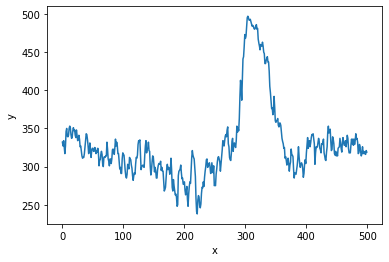

In [34]:
sns.lineplot(data=df,x="x",y="y",palette="flare")

In [61]:
thr_y = 400
peaks = np.where(y_sum > thr_y)[0]
peaks.shape

(48,)

In [58]:
peaks[-1]

340

In [70]:
peaks = np.concatenate(([0],peaks))
peaks = np.concatenate((peaks,[(peaks[-1] + 1000)]))

In [71]:
print("First element: ", peaks[0])
print("Second element: ", peaks[1])
print("Second last element: ",peaks[-2])
print("last element: ",peaks[-1])

First element:  0
Second element:  1
Second last element:  293
last element:  1293


#### Clean the peaks (precautionary measure)

In [72]:
thr_x = 50
temp = np.diff(peaks).squeeze()
idx = np.where(temp > thr_x)[0]
peaks = np.concatenate(([0], peaks[idx+1]), axis=0) + 1

In [73]:
peaks.shape

(3,)

#### Save the images

In [78]:
total_columns = 0

In [79]:
for i in np.arange(peaks.shape[0] -1):
    cv2.imwrite('column_' + str(i) + '.png', img[:, peaks[i]:peaks[i+1]])
    total_columns += 1

#### Read Image

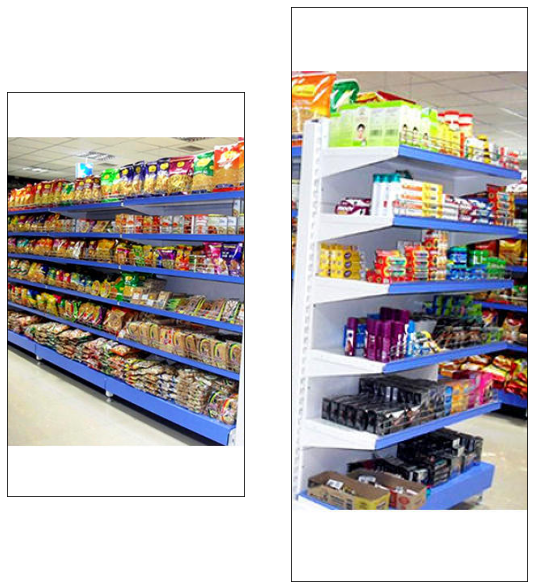

In [95]:
plt.figure(figsize=(50, 50))
for i in range (0,total_columns):
    plt.subplot(3,10,i+1)
    plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
    img = plt.imread('column_' + str(i) + '.png')
    plt.imshow(img)